In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 한글
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

save_flag = False # save visualized result

In [23]:
# 데이터 취합하기
forders = os.listdir('연도별/')
df_all = pd.DataFrame()
for i in range(0,len(forders)):
    if forders[i].split('.')[1] == 'csv':
        print(forders[i])
        file = "연도별/"+forders[i]
        df= pd.read_csv(file, encoding='utf-8')
        df_all = pd.concat([df_all, df])

서울특별시 공공자전거 이용정보(월별)_2017.csv
서울특별시 공공자전거 이용정보(월별)_2018.csv


C:\Users\comss\AppData\Local\Temp\ipykernel_11216\3959340210.py:8: DtypeWarning: Columns (1,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(file, encoding='utf-8')


서울특별시 공공자전거 이용정보(월별)_2019.csv
서울특별시 공공자전거 이용정보(월별)_2020.csv
서울특별시 공공자전거 이용정보(월별)_2021.csv
서울특별시 공공자전거 이용정보(월별)_2022.csv


In [7]:
YEARS = ['2017', '2018', '2019', '2020', '2021','2022']
MONTHS = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
ENG_MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [24]:
df_all

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2017-01,503,더샵스타시티 C동 앞,정기,F,~10대,7,389.44,3.51,15130.00,105
1,2017-01,509,이마트 버스정류소 옆,정기,F,~10대,2,239.5,2.33,10080.00,58
2,2017-01,300,정동사거리,정기,F,~10대,2,370.93,2.68,11580.00,108
3,2017-01,301,경복궁역 7번출구 앞,정기,F,~10대,3,140.03,1.26,5440.00,80
4,2017-01,304,광화문역 2번출구 앞,정기,F,~10대,1,28.1,0.3,1290.00,11
...,...,...,...,...,...,...,...,...,...,...,...
715502,2022-06,9999,상담센터,정기,M,기타,4,525.03,3.84,16543.52,109
715503,2022-06,88888,88888.영남배송,정기,M,60대,7,831.71,7.62,32816.68,200
715504,2022-06,99998,99998. 상암단말정비,정기,\N,20대,1,20.85,0.26,1120.00,11
715505,2022-06,99999,99999. 영남단말기정비,정기,\N,기타,15,0.00,0.00,0.00,25


In [168]:
YEARS = ['2017', '2018', '2019', '2020', '2021','2022']
MONTHS = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
ENG_MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def count_total_monthly_volume():
    count_list, record_date_list = [], []
    for year in YEARS:
        path = '연도별/서울특별시 공공자전거 이용정보(월별)_' + str(year) + '.csv'
        df = pd.read_csv(path)
        print('Counting year {}'.format(year))

        ## 연도별 다른 포멧으로 공개된 데이터 파싱
        for i in range(len(MONTHS)):
            if year == '2022':
                if i > 5: ## 현재 2022년 6월까지 공개
                    break
                year_month = '{}-{}'.format(2022,MONTHS[i])
                
            elif year == '2021':
                year_month = '{}-{}'.format(2021,MONTHS[i])
            elif year == '2020':
                year_month = '{}-{}'.format(2020,MONTHS[i])
            elif year == '2019':
                year_month = '{}-{}'.format(2019,MONTHS[i])
            elif year == '2018':
                year_month = '{}-{}'.format(2018,MONTHS[i])
            elif year == '2017':
                year_month = '{}-{}'.format(2017,MONTHS[i])
            
            count_list.append(df[df['대여일자'] == year_month]['이용건수'].sum())
            record_date_list.append(year + "-" + MONTHS[i])
    return count_list, record_date_list

def tabularize_total_monthly_volume(count_by_ten_hundreds_list, record_date_list):
    df = pd.DataFrame({'년-월': record_date_list, '이용자수(만명)': count_by_ten_hundreds_list})
    df['year'] = df['년-월'].apply(lambda x: x.split('-')[0])
    df['month'] = df['년-월'].apply(lambda x: x.split('-')[1])
    return df


count_list, record_date_list = count_total_monthly_volume()
count_by_ten_hundreds_list = [c / 1e4 for c in count_list] ## 가독성을 위해 만 단위로 나눔
total_monthly_volume_df = tabularize_total_monthly_volume(count_by_ten_hundreds_list, record_date_list)

Counting year 2017


C:\Users\comss\AppData\Local\Temp\ipykernel_11216\1148706937.py:9: DtypeWarning: Columns (1,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Counting year 2018
Counting year 2019
Counting year 2020
Counting year 2021
Counting year 2022


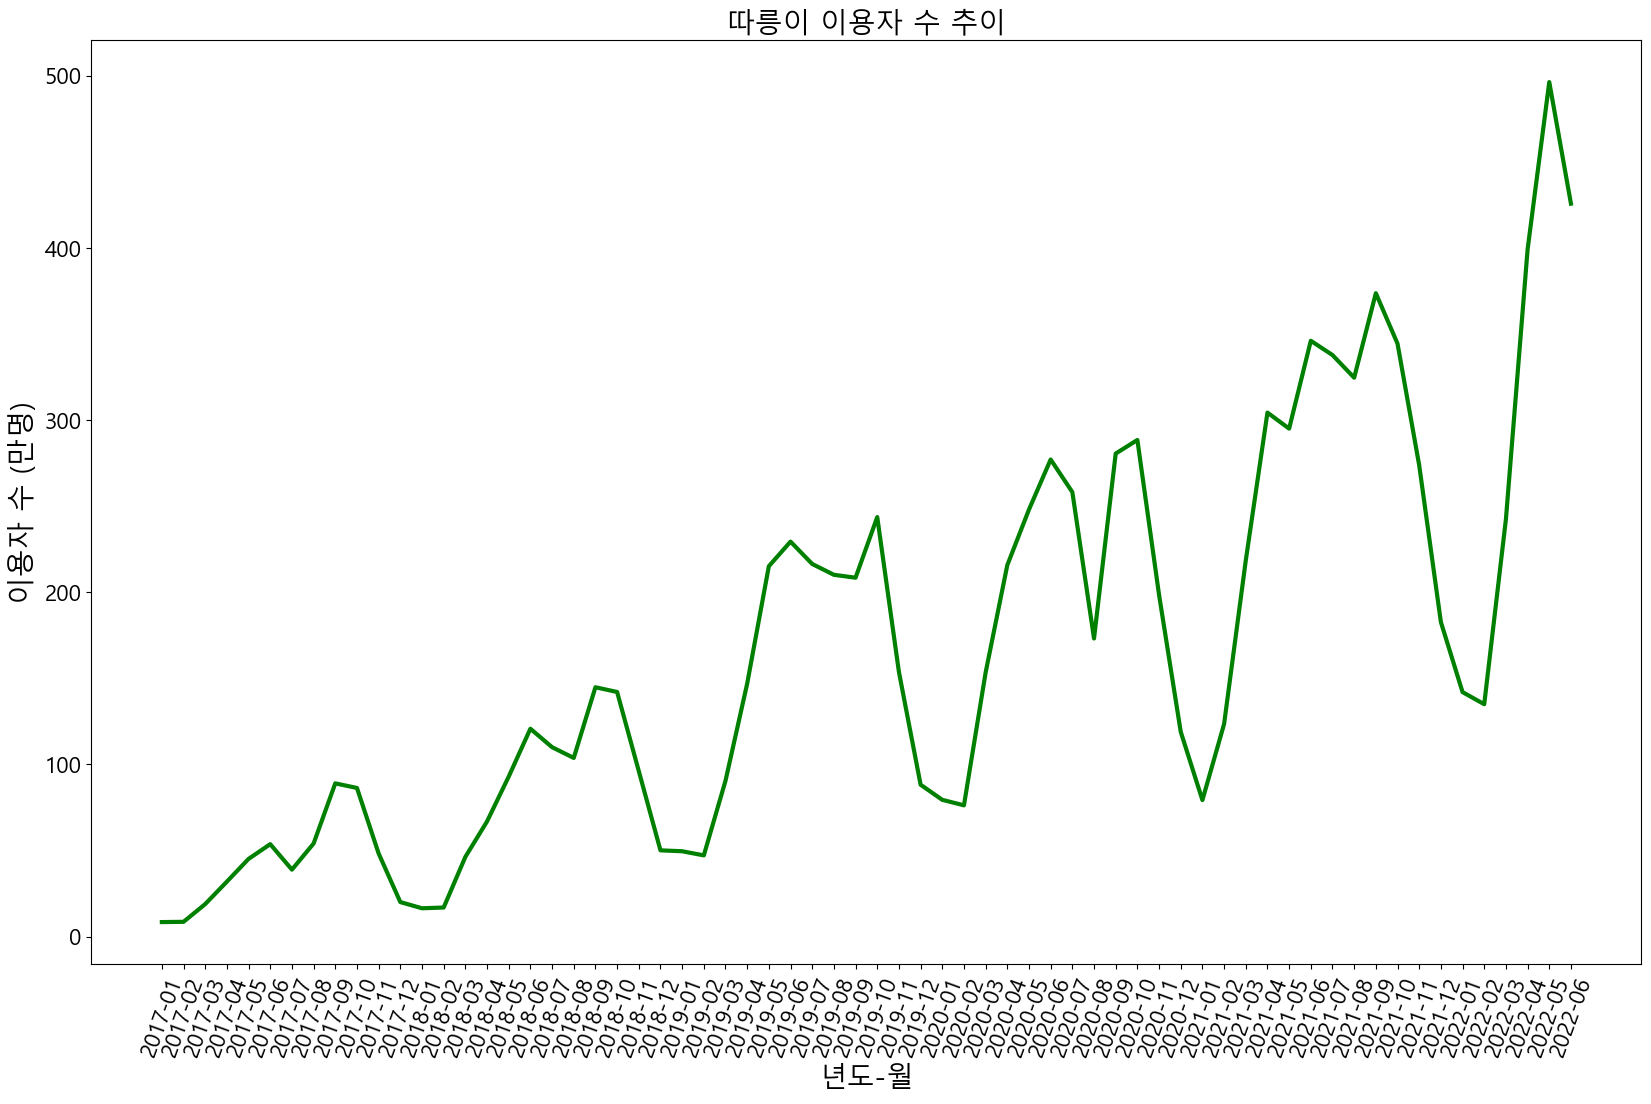

In [171]:
# 전체 이용자 수
plt.figure(figsize=(20, 12), facecolor='white')
plt.xlabel('년도-월', fontsize=20)
plt.ylabel('이용자 수 (만명)', fontsize=20)
plt.xticks(fontsize = 16, rotation = 70)
plt.yticks(fontsize = 16)
plt.title('따릉이 이용자 수 추이', fontsize=20)
plt.plot(record_date_list, count_by_ten_hundreds_list, color = 'green', linewidth = 3)
if save_flag:
    plt.savefig('1.따릉이-이용자-수-추이.png')
plt.show()

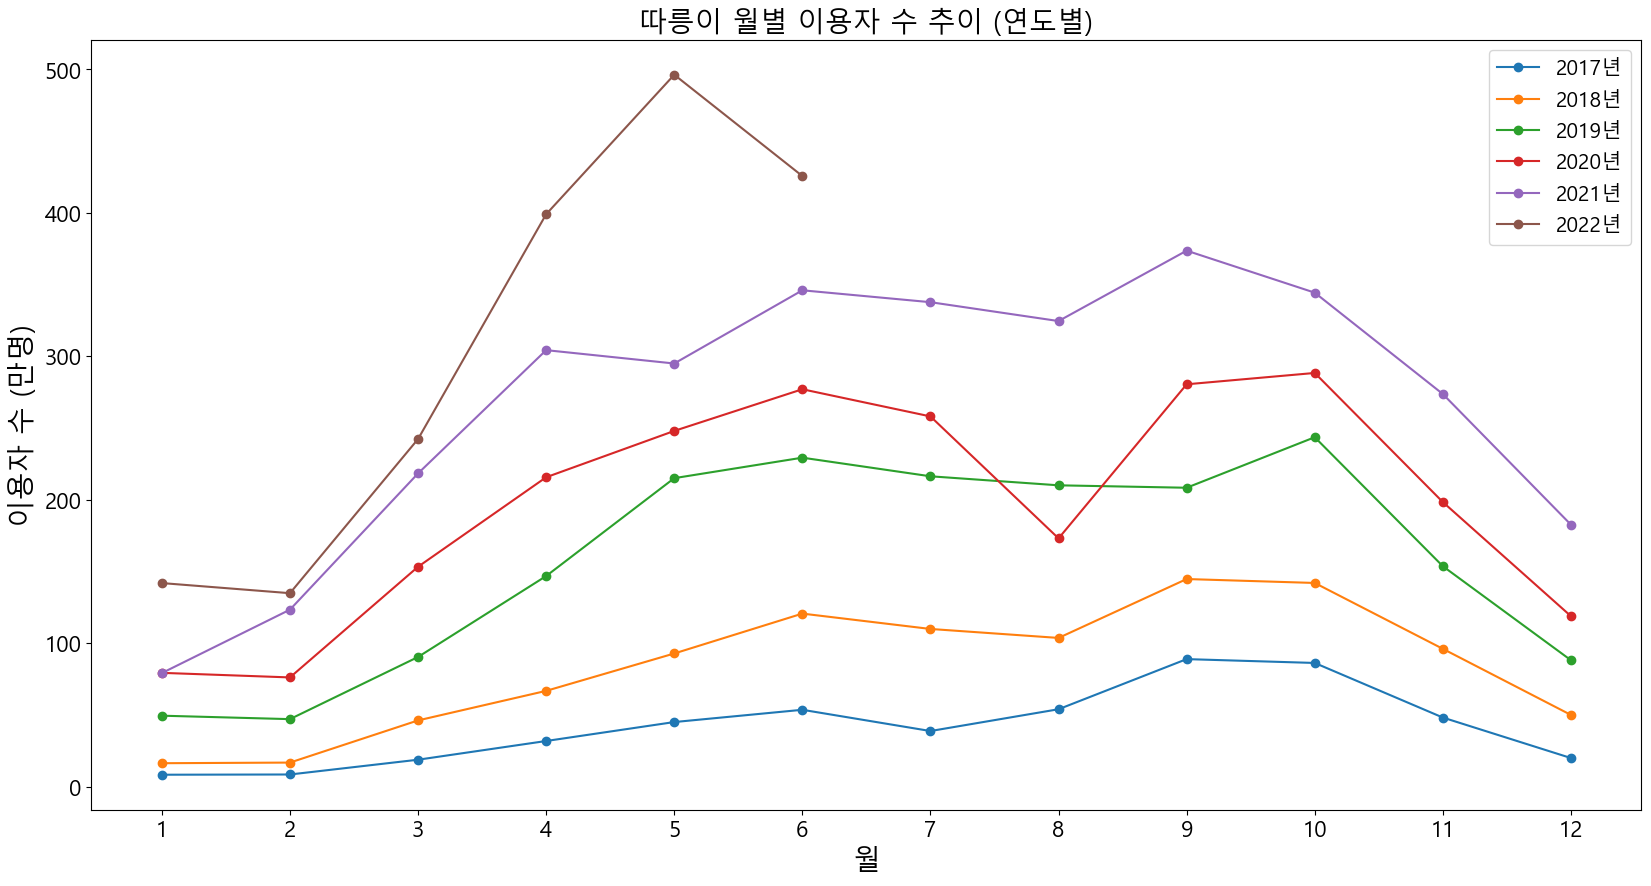

In [170]:
# 따릉이 이용자 수 (연도별)
plt.figure(figsize=(20, 10), facecolor='white')
plt.xlabel('월', fontsize = 20)
plt.ylabel('이용자 수 (만명)', fontsize = 20)
plt.xticks(list(range(1, len(MONTHS)+1)), fontsize = 16)
plt.yticks(fontsize = 16)
# plt.ticklabel_format(style = 'sci', scilimits = (4, 4))
plt.title('따릉이 월별 이용자 수 추이 (연도별)', fontsize = 20)
for year in YEARS:
    tgt_rows = total_monthly_volume_df[total_monthly_volume_df['year'] == year]
    plt.plot(tgt_rows['month'].astype(int), tgt_rows['이용자수(만명)'], label='{}년'.format(year), marker='o')
plt.legend(prop={'size': 15})
plt.show()